In [51]:
import pandas as pd   #to import xml file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    #rich colors in this pkg for graphing
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

### Creating a Data Frame from an xml file.

Apple Health data is saved as an xml file. Extensible Markup Language (XML) is a markup language and file format for storing, transmitting, and reconstructing arbitrary data. It defines a set of rules for encoding documents in a format that is both human-readable and machine-readable. It must be altered in order to ETL.Python's standard library contains xml package. This package has ElementTree module. This is a simple and lightweight XML processor API.

XML is a tree like hierarchical data format. The 'ElementTree' API in this module treats the whole XML document as a sort of dictionary tree where values are stored in a list. creating an element tree marries all the key-value pairs together in a more ordered dictionary.

The 'Element' class represents a single node in this tree. Reading and writing operations on XML files are done on the ElementTree level. Interactions with a single XML element and its sub-elements are done on the Element level. (plain English, please) [link explaining element trees](https://www.tutorialspoint.com/the-elementtree-xml-api-in-python).

In [52]:
import xml.etree.ElementTree as ET

In [53]:
df = pd.read_xml(r"C:\Users\Marcy\Documents\DATA\apple_health_export\export.xml")

In [54]:
# create element tree object 
tree = ET.parse(r"C:\Users\Marcy\Documents\DATA\apple_health_export\export.xml") 

In [55]:
# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [56]:
#print dictionary

In [57]:
# create DataFrame from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)

Making a copy of the dataset at this point, just in case. 

In [58]:
data_copy = data 

### Data Wrangling

In [59]:
# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606268 entries, 0 to 606267
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype                                 
---  ------         --------------   -----                                 
 0   type           606268 non-null  object                                
 1   sourceName     606268 non-null  object                                
 2   sourceVersion  605612 non-null  object                                
 3   unit           602451 non-null  object                                
 4   creationDate   606268 non-null  datetime64[ns, pytz.FixedOffset(-240)]
 5   startDate      606268 non-null  datetime64[ns, pytz.FixedOffset(-240)]
 6   endDate        606268 non-null  datetime64[ns, pytz.FixedOffset(-240)]
 7   value          606258 non-null  object                                
 8   device         590776 non-null  object                                
dtypes: datetime64[ns, pytz.FixedOffset(-240)](3), obj

Converting to Eastern Timezone, where I am

In [61]:
import pytz
eastern = pytz.timezone('US/Eastern')
data.index = data.index.tz_localize(pytz.utc).tz_convert(eastern) 

AttributeError: 'RangeIndex' object has no attribute 'tz_localize'

In [62]:
# value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')

In [63]:
# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

In [64]:
data.head()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
0,HKQuantityTypeIdentifierDietaryWater,Thirstic,41,mL,2022-07-26 16:31:25-04:00,2022-07-26 16:31:25-04:00,2022-07-26 16:31:25-04:00,591.470,NaN
1,HKQuantityTypeIdentifierDietaryWater,Thirstic,41,mL,2022-07-26 16:31:33-04:00,2022-07-26 16:31:33-04:00,2022-07-26 16:31:33-04:00,236.588,NaN
2,HKQuantityTypeIdentifierDietaryWater,Water Reminder,1.7.28,mL,2022-07-26 16:33:01-04:00,2022-07-26 16:32:58-04:00,2022-07-26 16:32:58-04:00,295.736,NaN
3,HKQuantityTypeIdentifierDietaryWater,Water Reminder,1.7.28,mL,2022-07-26 16:33:11-04:00,2022-07-26 16:33:06-04:00,2022-07-26 16:33:06-04:00,260.247,NaN
4,HKQuantityTypeIdentifierDietaryWater,Water Reminder,1.7.28,mL,2022-07-27 13:34:41-04:00,2022-07-27 13:34:41-04:00,2022-07-27 13:34:41-04:00,260.247,NaN


In [65]:
len(data)

606268

The column names are too long - need to simplify them.

In [66]:
# shorter observation names: use vectorized replace function
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')

In [67]:
data.tail()

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device
606263,HeartRateVariabilitySDNN,Marcy’s Apple Watch,8.7,ms,2022-08-06 14:47:44-04:00,2022-08-06 14:46:38-04:00,2022-08-06 14:47:38-04:00,58.7893,"<<HKDevice: 0x283201540>, name:Apple Watch, ma..."
606264,HeartRateVariabilitySDNN,Marcy’s Apple Watch,8.7,ms,2022-08-06 16:54:32-04:00,2022-08-06 16:53:26-04:00,2022-08-06 16:54:26-04:00,11.0529,"<<HKDevice: 0x283201540>, name:Apple Watch, ma..."
606265,HeartRateVariabilitySDNN,Marcy’s Apple Watch,8.7,ms,2022-08-06 18:54:36-04:00,2022-08-06 18:53:34-04:00,2022-08-06 18:54:34-04:00,14.4165,"<<HKDevice: 0x283201540>, name:Apple Watch, ma..."
606266,HeartRateVariabilitySDNN,Marcy’s Apple Watch,8.7,ms,2022-08-06 20:48:24-04:00,2022-08-06 20:47:21-04:00,2022-08-06 20:48:21-04:00,26.5439,"<<HKDevice: 0x283201540>, name:Apple Watch, ma..."
606267,HeartRateVariabilitySDNN,Marcy’s Apple Watch,8.7,ms,2022-08-06 22:47:48-04:00,2022-08-06 22:46:46-04:00,2022-08-06 22:47:45-04:00,11.8879,"<<HKDevice: 0x283201540>, name:Apple Watch, ma..."


In [68]:
data.type.unique()

array(['DietaryWater', 'Height', 'BodyMass', 'HeartRate', 'StepCount',
       'DistanceWalkingRunning', 'BasalEnergyBurned',
       'ActiveEnergyBurned', 'FlightsClimbed', 'AppleExerciseTime',
       'DistanceCycling', 'DistanceSwimming', 'SwimmingStrokeCount',
       'WaistCircumference', 'RestingHeartRate', 'VO2Max',
       'WalkingHeartRateAverage', 'EnvironmentalAudioExposure',
       'HeadphoneAudioExposure', 'WalkingDoubleSupportPercentage',
       'SixMinuteWalkTestDistance', 'AppleStandTime', 'WalkingSpeed',
       'WalkingStepLength', 'WalkingAsymmetryPercentage',
       'StairAscentSpeed', 'StairDescentSpeed', 'AppleWalkingSteadiness',
       'AppleStandHour', 'MindfulSession', 'HeartRateVariabilitySDNN'],
      dtype=object)

In [69]:
list(data)

['type',
 'sourceName',
 'sourceVersion',
 'unit',
 'creationDate',
 'startDate',
 'endDate',
 'value',
 'device']

Pivot and resample the dataset - break BodyMass and DistanceWalkingRunning into monthly aggregations

In [70]:
pivot_df = data.pivot_table(index='endDate', columns='type', values='value')
agg_df = pivot_df.resample('M').agg({'BodyMass' : np.mean,
                                 'DistanceWalkingRunning' : np.mean})

In [71]:
# calculate monthly difference in weight
agg_df['Delta'] = agg_df['BodyMass'].diff()


In [72]:
list(agg_df)

['BodyMass', 'DistanceWalkingRunning', 'Delta']

DistanceWalkingRunning over Time using Seaborn

<AxesSubplot:xlabel='endDate', ylabel='DistanceWalkingRunning'>

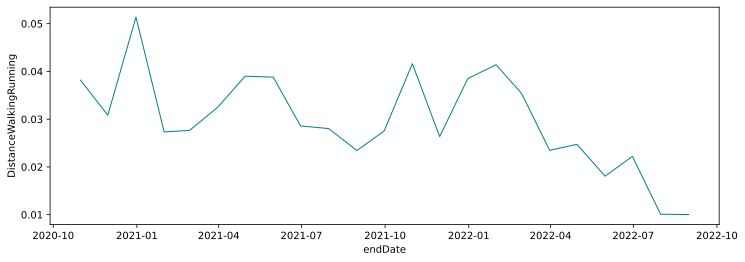

In [73]:
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=agg_df['DistanceWalkingRunning'], color='teal', linewidth=1)

Now to aggregate the rest of the columns

In [74]:
pivot_df2 = data.pivot_table(index='endDate', columns='type', values='value')
agg_df2 = pivot_df.resample('M').agg({'HeartRate' : np.mean,
                                 'StepCount' : np.mean, 'BasalEnergyBurned' : np.mean, 'ActiveEnergyBurned': np.mean, 'AppleExerciseTime': np.sum, 'DistanceSwimming': np.sum, 'RestingHeartRate': np.mean, 'AppleStandHour': np.sum})

In [75]:
agg_df2.head()

type,HeartRate,StepCount,BasalEnergyBurned,ActiveEnergyBurned,AppleExerciseTime,DistanceSwimming,RestingHeartRate,AppleStandHour
endDate,,,,,,,,
2020-10-31 00:00:00-04:00,90.121495,90.478803,20.909176,0.468166,1.0,0.0,72.500000,10.0
2020-11-30 00:00:00-04:00,90.929502,74.940700,18.236663,0.539684,15.0,0.0,79.000000,108.0
2020-12-31 00:00:00-04:00,84.398173,133.100157,28.557188,0.697220,32.0,0.0,70.000000,79.0
2021-01-31 00:00:00-04:00,97.874645,77.121051,9.458081,0.728786,201.0,0.0,72.708333,273.0
2021-02-28 00:00:00-04:00,95.925473,84.208303,7.628516,0.772527,107.0,0.0,76.272727,246.0


<AxesSubplot:xlabel='endDate', ylabel='ActiveEnergyBurned'>

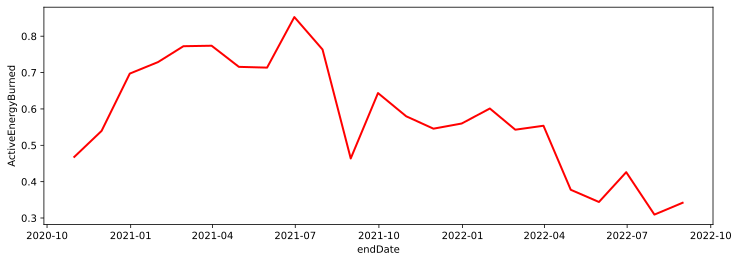

In [76]:
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=agg_df2['ActiveEnergyBurned'], color='red', linewidth=2)

<AxesSubplot:xlabel='endDate', ylabel='BasalEnergyBurned'>

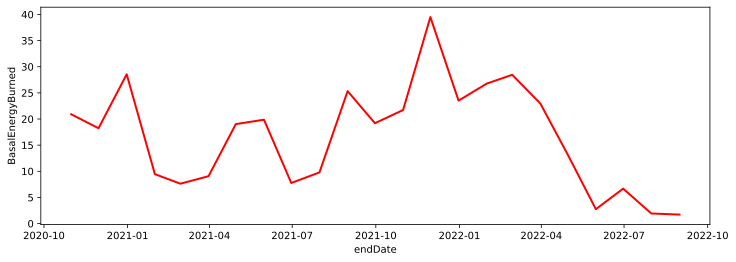

In [77]:
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=agg_df2['BasalEnergyBurned'], color='red', linewidth=2)

It's interesting to note the activity level drops in March 2022.

<AxesSubplot:xlabel='endDate', ylabel='Delta'>

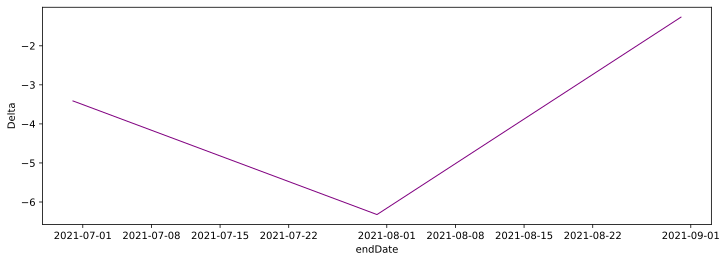

In [78]:
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=agg_df['Delta'], color='purple', linewidth=1)

<AxesSubplot:>

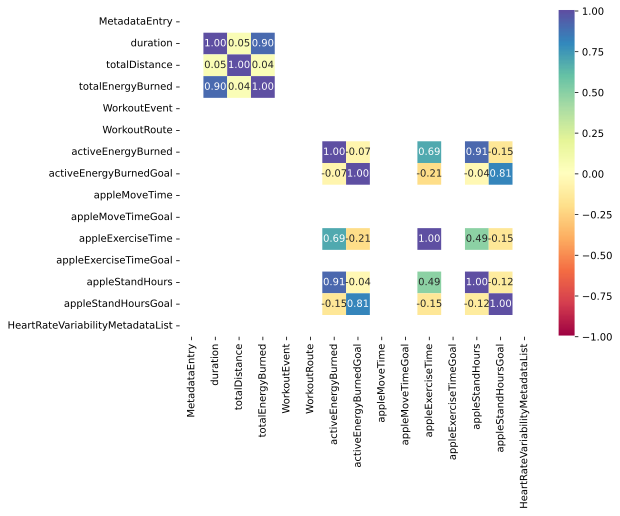

In [79]:
corrplot = df.corr()
#heat map
fig = plt.figure(figsize=(8,6)) 
sns.heatmap(corrplot, annot=True, fmt=".2f", vmin=-1.0, vmax=+1.0, cmap='Spectral')

<AxesSubplot:xlabel='type', ylabel='type'>

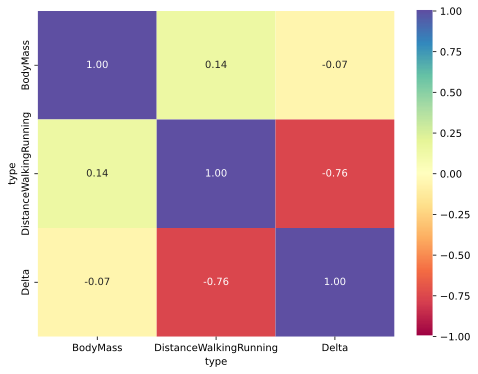

In [81]:
corrplot = agg_df.corr()
#heat map
fig = plt.figure(figsize=(8,6)) 
sns.heatmap(corrplot, annot=True, fmt=".2f", vmin=-1.0, vmax=+1.0, cmap='Spectral')

Negative correlation with distance walking and running with change in body mass = weight loss. 

Missing alot of data in here - subset just the columns I have data for 

#### There's a larger positive correlation between StandHours and activeEnergyBurned than there is with ExerciseTime and activeEnergyBurned. 

#### Linear Regression -

I noticed there might be some duplicate entries, when wearing the watch and using my phone and airpods. Will have to check that.

steps = df.type == "StepCount"

steps.to_csv("data/steps.csv", index = False)

In [84]:
steps_by_date = agg_df2.StepCount.groupby(['endDate']).sum()

In [85]:
steps_by_date.tail()

endDate
2022-04-30 00:00:00-04:00    55.208143
2022-05-31 00:00:00-04:00    45.531383
2022-06-30 00:00:00-04:00    51.530590
2022-07-31 00:00:00-04:00    38.318268
2022-08-31 00:00:00-04:00    27.388948
Freq: M, Name: StepCount, dtype: float64

<AxesSubplot:xlabel='endDate', ylabel='StepCount'>

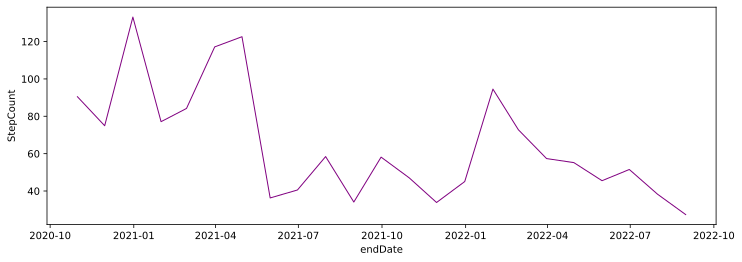

In [ ]:
fig = plt.figure(figsize=(12,4)) 
sns.lineplot(data=steps_by_date, color='purple', linewidth=1)

check scale in stepcount - it's off

steps = df.type == "StepCount"

steps.to_csv("data/steps.csv", index = False)